In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4056,3329-WDIOK,Female,0,No,No,3,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,50.60,155.35,Yes
6638,4990-ALDGW,Male,0,No,No,57,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.75,1118.8,No
2929,2606-PKWJB,Male,0,No,Yes,40,No,No phone service,DSL,Yes,...,No,Yes,No,No,One year,No,Mailed check,40.25,1564.05,No
3942,6959-UWKHF,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,42.90,42.9,Yes
5793,3873-NFTGI,Male,0,No,No,14,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),55.50,767.55,No


# Data Cleaning

In [3]:
df.drop(columns=["customerID"],inplace=True)

In [4]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')

In [7]:
df.TotalCharges.isnull().sum()

11

In [8]:
df.shape

(7043, 20)

In [9]:
#so it is ok to remove the 11 rows out of 7043


In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(7032, 20)

In [12]:
df.TotalCharges.dtypes

dtype('float64')

In [13]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [14]:
df.replace('No internet service','No',inplace=True)

In [15]:
df.replace('No phone service','No',inplace=True)

In [16]:
print_unique_col_values(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
df.replace('Yes',1,inplace=True)

In [18]:
df.replace('No',0,inplace=True)

C:\Users\santo\AppData\Local\Temp\ipykernel_6520\507616924.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace('No',0,inplace=True)


In [19]:
for column in df:
    print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [20]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [21]:
df["gender"].replace({'Female':1,'Male':0},inplace=True)

C:\Users\santo\AppData\Local\Temp\ipykernel_6520\3879885981.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["gender"].replace({'Female':1,'Male':0},inplace=True)
C:\Users\santo\AppData\Local\Temp\ipykernel_6520\3879885981.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gender"].replac

In [23]:
df["gender"].unique()

array([1, 0], dtype=int64)

In [25]:
df.drop(columns=["PaymentMethod"],inplace=True)

In [26]:
df1 = pd.get_dummies(data=df,columns=['InternetService','Contract'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [28]:
df.shape

(7032, 19)

In [29]:
df1.shape

(7032, 23)

In [31]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,0,False,True,False,True,False,False
1,0,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,0,False,True,False,False,True,False
2,0,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,1,False,True,False,True,False,False
3,0,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,0,False,True,False,False,True,False
4,1,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,1,False,False,True,True,False,False


In [35]:
true_false_cols = ['InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year']

In [36]:
for col in true_false_cols:
    df1[col].replace({True:1,False:0},inplace=True)

C:\Users\santo\AppData\Local\Temp\ipykernel_6520\2673908500.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({True:1,False:0},inplace=True)
C:\Users\santo\AppData\Local\Temp\ipykernel_6520\2673908500.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({True:1,Fal

In [37]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,0,0,1,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,0,0,1,0,0,1,0
2,0,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,1,0,1,0,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,0,0,1,0,0,1,0
4,1,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,1,0,0,1,1,0,0


In [38]:
df1.dtypes

gender                           int64
SeniorCitizen                    int64
Partner                          int64
Dependents                       int64
tenure                           int64
PhoneService                     int64
MultipleLines                    int64
OnlineSecurity                   int64
OnlineBackup                     int64
DeviceProtection                 int64
TechSupport                      int64
StreamingTV                      int64
StreamingMovies                  int64
PaperlessBilling                 int64
MonthlyCharges                 float64
TotalCharges                   float64
Churn                            int64
InternetService_0                int64
InternetService_DSL              int64
InternetService_Fiber optic      int64
Contract_Month-to-month          int64
Contract_One year                int64
Contract_Two year                int64
dtype: object

In [41]:
# Hence converted all categorical data into numerical data

# Scaling

In [42]:
for column in df1:
    print(f'{column} : {df1[column].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
PaperlessBilling : [1 0]
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]
InternetService_0 : [0 1]
InternetService_DSL : [1 0]
InternetService_Fiber optic : [0 1]
Contract_Month-to-month : [1 0]
Contract_One year : [0 1]
Contract_Two year : [0 1]


In [44]:
#we need to scale 'tenure','MonthlyCharges','TotalCharges'

In [45]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
sc = MinMaxScaler()
df1[cols_to_scale] = sc.fit_transform(df1[cols_to_scale])

In [49]:
df1.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year
4655,1,0,0,0,0.436620,1,1,1,0,0,...,0,0.562189,0.261268,0,0,1,0,0,1,0
4863,0,0,1,1,0.788732,1,0,0,0,0,...,0,0.024876,0.127435,0,1,0,0,0,0,1
1970,1,0,1,0,0.084507,1,0,0,0,0,...,1,0.625373,0.064372,1,0,0,1,1,0,0
3774,0,1,1,1,0.718310,1,1,0,1,1,...,1,0.622886,0.468584,0,0,1,0,0,1,0
6622,0,0,0,0,0.014085,1,1,0,0,0,...,0,0.435821,0.011482,1,0,1,0,1,0,0


In [50]:
# now all values are  between 0 to 1

# Splitting

In [51]:
#splitting input and output

In [52]:
x = df1.drop(columns=["Churn"])
y = df1["Churn"]

In [53]:
#splitting train and test data:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

# Creating Neural Network

In [88]:
import tensorflow as tf
from tensorflow import keras

In [101]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(22,),activation='relu'), #hidden layer
    keras.layers.Dense(1,activation='sigmoid'),          #Output layer
])

C:\Users\santo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
model.compile(optimizer = 'adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])


In [108]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8273 - loss: 0.3686
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8155 - loss: 0.3846
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8258 - loss: 0.3673
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8165 - loss: 0.3923
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8268 - loss: 0.3715
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8224 - loss: 0.3745
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8204 - loss: 0.3717
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8123 - loss: 0.3869
Epoch 9/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8286 - loss: 0.3678
Epoch 10/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8188 - loss: 0.3828


In [109]:
model.evaluate(x_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8005 - loss: 0.4442


[0.457631915807724, 0.7889125943183899]

In [110]:
yp = model.predict(x_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [114]:
y_pred = []
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [115]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [116]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [117]:
# it predicted 8 out of 10 values correctly

In [118]:
# Confusion Matrix

In [119]:
import seaborn as sns

Text(95.72222222222221, 0.5, 'Truth')

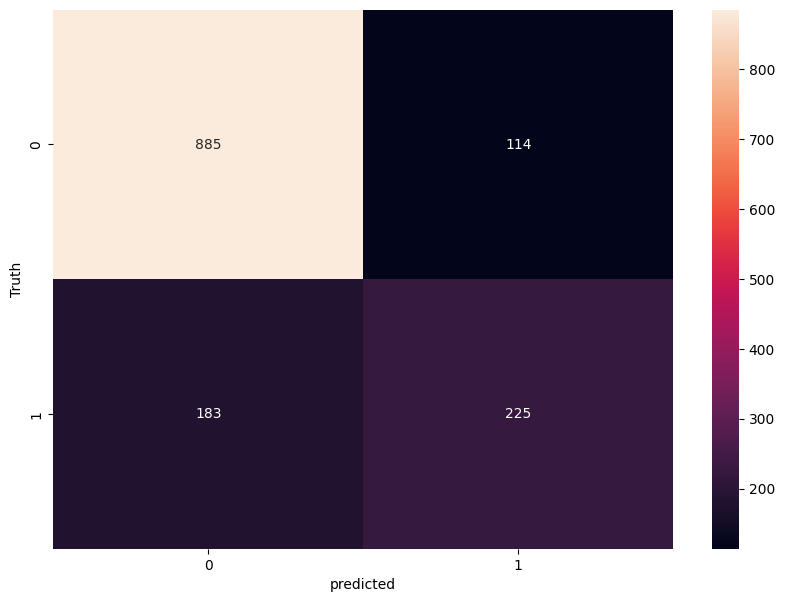

In [121]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')